In [1]:
import networkx as nx
import random
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# import empirical netwrok
em_mat=pd.read_csv('C:/Users/wyw25/thesis/MAT_experiment/2018-01-25.csv', header=None)

In [3]:
# load the nestedness of the empirical netwrok
N_list=[]
Q_list=[]
I_list=[]
I_MQ_list=[]

for i in range(200):
    nestedness=pd.read_csv("C:/Users/wyw25/thesis/2018-01-25/"+str(i)+"/data_structures_NQI_results2018-01-25.csv")
    
    N=nestedness['N'].values[0]
    Q=nestedness['Q'].values[0]
    I=nestedness['I'].values[0]
    I_MQ=nestedness['I_MQ'].values[0]
    
    
    N_list.append(N)
    Q_list.append(Q)
    I_list.append(I)
    I_MQ_list.append(I_MQ)


In [4]:
N_observation=np.mean(N_list)
Q_observation=np.mean(Q_list)
I_observation=np.mean(I_list)
I_MQ_observation=np.mean(I_MQ_list)


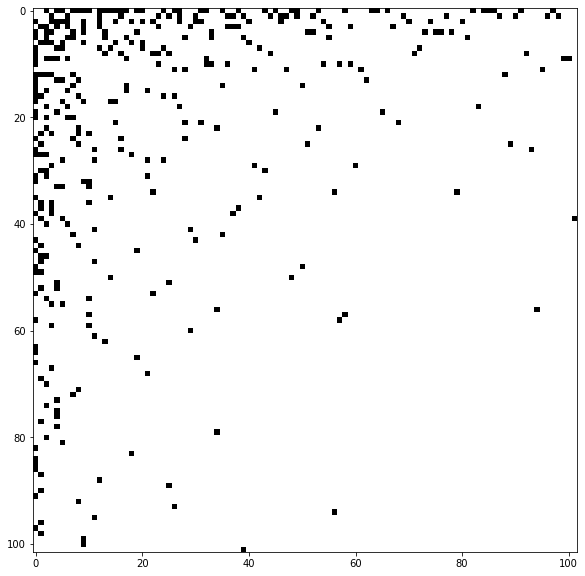

In [6]:
G_empirical=nx.from_numpy_array(np.array(em_mat))
degreeofday=dict(G_empirical.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G_empirical,nodenewlist)

In [7]:
# import the simulated network
# load the dict of dataframes
with open('simulation_100/simulation_100.pkl', 'rb') as fp:
    simutable = pickle.load(fp)


In [8]:
# import the computed Q, nodf, IBNestedness of all simulated point

with open('parameter_100/I.pkl', 'rb') as fp:
    I = pickle.load(fp)
    
with open('parameter_100/Q.pkl', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('parameter_100/N.pkl', 'rb') as fp:
    N = pickle.load(fp)
    
with open('parameter_100/I_MQ.pkl', 'rb') as fp:
    I_MQ = pickle.load(fp)


In [9]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(10, 10)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)

In [13]:
#combination1

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k]  
   
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

In [11]:
# combination2

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
  #  average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
        
    
    return Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
   # average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return Q_index,N_index,I_index

In [12]:
# combination3

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
    
    
    return average_degree,clustering_coefficient

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient

In [14]:
def likelihood(params, real_data, simulated_data):
    """
    Calculate the likelihood of observing the real data given the parameters.

    Parameters:
    - params: array-like, the parameters (pL_s, pL_d, pNL_nl)
    - real_data: array-like, the real network properties (average_degree, average_path_length, clustering_coefficient)
    - simulated_data: array-like, the simulated network properties for the given parameters
    - uncertainties: array-like, uncertainties for each network property

    Returns:
    - likelihood_value: float, the likelihood value
    """
    # Calculate the squared differences between simulated and real data

    squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2


    # Calculate the log-likelihood (assuming normal distribution)
    log_likelihood = -0.5 * np.sum(squared_diff)
    likelihood=np.exp(log_likelihood)

    return likelihood



In [17]:
parameter_LIST = {}
for i in tqdm(range(len(simutable))):
    parameter_LIST[i] = {}
    for j in range(len(simutable[1])):
        parameter_LIST[i][j] = {}
        for k in range(len(simutable[1][1])):
            simumat=simutable[i][j][k]
            G_simu=nx.from_numpy_array(np.array(simutable[i][j][k]))
            parameter_simu=np.array(Compute_properties(G_simu,i,j,k,I,Q,N,I_MQ))
            parameter_LIST[i][j][k]=parameter_simu

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.32s/it]


In [18]:
# Example usage:
# Replace the following with your actual data and uncertainties
real_data =np.array(Compute_properties_OBSERVATION(G_empirical,N_observation,I_observation,Q_observation,I_MQ_observation))
#uncertainties = np.array([0.2, 0.2, 0.2])
likelihoodlist=[]

compare=0
i_max=0
j_max=0
k_max=0

for i in range(len(simutable)):
    for j in range(len(simutable[1])):
        for k in range(len(simutable[1][1])):           
            simulated_data = parameter_LIST[i][j][k]

            # Replace with the actual parameter values you want to evaluate
            parameters_to_evaluate = np.array([0.5,0.5, 0.5])

            # Calculate the likelihood for the given parameters
            likelihood_value = likelihood(parameters_to_evaluate, real_data, simulated_data)
            
            if np.isnan(likelihood_value):
                likelihood_value=0
            if likelihood_value>compare:
                compare=likelihood_value
                i_max=i
                j_max=j
                k_max=k
                
            
            likelihoodlist.append(likelihood_value)

            print("Likelihood:", likelihood_value)

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 5.473883685750322e-258
Likelihood: 0.0
Likelihood: 5.80845183011393e-165
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.81706822833787e-235
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.516477473164085e-284
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.37355758789302e-102
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.6864412761675244e-204
Likelihood: 5.520072738517562e-206
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.488201775022497e-238
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.6153997361613175e-284
Likelihood: 0.0
Likelihood: 4.78249456797062e-254
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 

Likelihood: 0.02252095859051744
Likelihood: 6.2631866917066934e-24
Likelihood: 7.935328456240289e-26
Likelihood: 0.05722038530468987
Likelihood: 2.359071626686426e-15
Likelihood: 1.966252316341485e-24
Likelihood: 1.1475548488706498e-18
Likelihood: 0.12903311046327798
Likelihood: 0.0011182991606378703
Likelihood: 2.321723910666191e-13
Likelihood: 4.141666922828792e-16
Likelihood: 1.3905118549640593e-11
Likelihood: 0.022348498588055894
Likelihood: 0.7110589545933264
Likelihood: 7.0314662283065276e-15
Likelihood: 1.2427447808829004e-16
Likelihood: 2.0454406445590375e-13
Likelihood: 6.696360809980378e-18
Likelihood: 2.8773646479477535e-10
Likelihood: 1.2448289818415554e-13
Likelihood: 3.2260872865823164e-10
Likelihood: 2.5610335991216323e-21
Likelihood: 1.8154466264954652e-07
Likelihood: 5.733133678601966e-20
Likelihood: 2.611559008265087e-16
Likelihood: 1.4173480877324314e-14
Likelihood: 2.1797605654848755e-12
Likelihood: 4.585825936678848e-39
Likelihood: 2.513415590326903e-22
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeliho

Likelihood: 2.2272181900144096e-133
Likelihood: 8.272344961127062e-154
Likelihood: 1.0415185791053625e-95
Likelihood: 0.0
Likelihood: 1.2585503959199475e-148
Likelihood: 2.900495350993786e-131
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.488465375141473e-284
Likelihood: 9.623175878974163e-81
Likelihood: 3.370993441449044e-280
Likelihood: 2.1991943988060637e-135
Likelihood: 2.8535773843360345e-53
Likelihood: 1.4482196158921118e-240
Likelihood: 8.102833209914129e-178
Likelihood: 1.6025639820239516e-241
Likelihood: 2.22214847514831e-104
Likelihood: 2.1027803540021897e-285
Likelihood: 0.0
Likelihood: 1.1155659466683097e-149
Likelihood: 1.0609656308853675e-94
Likelihood: 5.514424723775251e-117
Likelihood: 3.3859613453377514e-198
Likelihood: 1.045148621097232e-169
Likelihood: 5.825727190235965e-176
Likelihood: 3.0919078918503654e-154
Likelihood: 0.0
Likelihood: 2.0530721460296482e-237
Likelihood: 2.488201775022497e-238
Likelihood: 2.426387322429335e-241
Likelihood: 7.286051148269568e-155
Li

Likelihood: 0.020915160939013265
Likelihood: 0.01996488119353103
Likelihood: 7.722555339488267e-06
Likelihood: 0.043973806975592694
Likelihood: 0.05683986816385331
Likelihood: 0.0005465719743112159
Likelihood: 0.004222105562722413
Likelihood: 0.6805351044378036
Likelihood: 0.0893165370581343
Likelihood: 0.3332841583574265
Likelihood: 5.0559137817214606e-05
Likelihood: 0.000627528822497513
Likelihood: 0.7648921910771292
Likelihood: 0.003210947851271749
Likelihood: 5.20987038550127e-06
Likelihood: 0.00022956407894719863
Likelihood: 0.0037627618113695695
Likelihood: 0.6880462974090822
Likelihood: 0.05305598921707221
Likelihood: 0.017102989375280583
Likelihood: 0.019931093882957877
Likelihood: 0.004215308811061109
Likelihood: 0.04147559287409288
Likelihood: 0.008642352415085748
Likelihood: 0.618426988521366
Likelihood: 0.007097979765197633
Likelihood: 0.006015930986543082
Likelihood: 0.7443316083288744
Likelihood: 0.8158526692073084
Likelihood: 0.0015336488276237064
Likelihood: 0.000476995

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 6.827533386451192e-125
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.1394331634317264e-125
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3540432948870886e-39
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Li

Likelihood: 7.550074222288265e-57
Likelihood: 1.792361548790155e-64
Likelihood: 7.3984930191741815e-53
Likelihood: 7.106315137394248e-44
Likelihood: 1.962320642489531e-168
Likelihood: 6.8350948749196896e-09
Likelihood: 1.8593528084897566e-135
Likelihood: 1.4731952477464583e-76
Likelihood: 2.1237100523936914e-105
Likelihood: 2.473388720561552e-71
Likelihood: 0.00012584918925234075
Likelihood: 5.960113895095608e-69
Likelihood: 1.9453677751471671e-119
Likelihood: 1.9553927987224704e-118
Likelihood: 6.86343794735658e-88
Likelihood: 4.982162688372771e-85
Likelihood: 7.941736457653125e-55
Likelihood: 7.18093590226569e-48
Likelihood: 0.00983768333686724
Likelihood: 4.1597187872961626e-52
Likelihood: 1.353212553660893e-108
Likelihood: 1.0461368938718033e-47
Likelihood: 9.851620065546283e-59
Likelihood: 4.056810372680582e-63
Likelihood: 4.2712357524946336e-47
Likelihood: 3.0350811573764727e-85
Likelihood: 8.651363323492641e-173
Likelihood: 5.953377772633545e-53
Likelihood: 9.318969646187322e-92

Likelihood: 0.07980492332757282
Likelihood: 0.07819737263730056
Likelihood: 0.07643207849511845
Likelihood: 0.07939467306979485
Likelihood: 0.08067386347001582
Likelihood: 0.07586054821740676
Likelihood: 0.08304696558383283
Likelihood: 0.08249818541103777
Likelihood: 0.07374762193578673
Likelihood: 0.088808926329546
Likelihood: 0.07757096440720623
Likelihood: 0.09089873506828704
Likelihood: 0.07590481960095774
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 

Likelihood: 5.3686297e-316
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.517308648418984e-291
Likelihood: 2.0303417927e-313
Likelihood: 0.0
Likelihood: 3.7288560292643825e-109
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.787513914005042e-124
Likelihood: 8.458460416355619e-249
Likelihood: 7.686454057361182e-295
Likelihood: 4.235087238539019e-270
Likelihood: 5.7843265583287375e-239
Likelihood: 3.5688100410903357e-286
Likelihood: 0.0
Likelihood: 2.521575563284966e-199
Likelihood: 5.571946368545915e-238
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.508824170374296e-283
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.192414644061804e-89
Likelihood: 4.196041514984702e-299
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeli

Likelihood: 1.6021183650270294e-13
Likelihood: 4.911729880440789e-16
Likelihood: 7.070323305516666e-11
Likelihood: 5.419975630969671e-13
Likelihood: 2.4294623008306847e-17
Likelihood: 2.3430606905701403e-14
Likelihood: 4.095438499733234e-10
Likelihood: 2.3764922841132207e-10
Likelihood: 7.349214895987645e-10
Likelihood: 1.941350700060548e-13
Likelihood: 2.3085832863977067e-17
Likelihood: 2.9553401977452677e-09
Likelihood: 5.756644187802712e-29
Likelihood: 5.621869733328954e-26
Likelihood: 4.599433781905813e-13
Likelihood: 0.0009410916429574936
Likelihood: 0.18865481732217845
Likelihood: 3.9172959445801845e-17
Likelihood: 2.559855936918881e-13
Likelihood: 4.928631341544949e-07
Likelihood: 0.0011533457635244306
Likelihood: 2.016936211514963e-13
Likelihood: 1.415438157846061e-16
Likelihood: 0.6513162084329921
Likelihood: 4.021892122259692e-09
Likelihood: 1.0668051281653265e-10
Likelihood: 7.911543076202076e-26
Likelihood: 1.3523465661473655e-12
Likelihood: 0.5221264699517242
Likelihood: 2

Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeliho

Likelihood: 1.5345537956887573e-95
Likelihood: 0.0
Likelihood: 1.0174452954807018e-134
Likelihood: 1.7082539227538232e-84
Likelihood: 7.702748312909171e-84
Likelihood: 3.4309969002532376e-152
Likelihood: 6.915448597952452e-242
Likelihood: 3.514108830933561e-62
Likelihood: 5.291677920638292e-235
Likelihood: 5.617024979200675e-214
Likelihood: 3.4309969002532376e-152
Likelihood: 0.0
Likelihood: 2.4869229857117326e-91
Likelihood: 1.0395358247809336e-154
Likelihood: 2.2829365352560306e-130
Likelihood: 1.60402168461378e-134
Likelihood: 1.6934931858142078e-105
Likelihood: 4.2746821535225442e-106
Likelihood: 8.487501500556149e-144
Likelihood: 5.90763831598358e-237
Likelihood: 9.660368240340662e-152
Likelihood: 9.843996340656829e-96
Likelihood: 0.0
Likelihood: 6.67685875208243e-154
Likelihood: 5.1566051387936016e-105
Likelihood: 1.4336958954188051e-75
Likelihood: 2.488201775022497e-238
Likelihood: 5.90763831598358e-237
Likelihood: 5.354586046587327e-253
Likelihood: 4.366172384516598e-105
Likeli

Likelihood: 0.5753836556902931
Likelihood: 0.5743865977075433
Likelihood: 0.2884883969745094
Likelihood: 0.14395380624965476
Likelihood: 0.49943082436998154
Likelihood: 0.7085486237912312
Likelihood: 0.16369690175704246
Likelihood: 0.3492917566216295
Likelihood: 0.09097401861160959
Likelihood: 0.17408976885343033
Likelihood: 0.7234856023857041
Likelihood: 0.1655492463750115
Likelihood: 0.5487764147651771
Likelihood: 0.062342382373365694
Likelihood: 0.7225190053729412
Likelihood: 0.8617588947893451
Likelihood: 0.10970336216687222
Likelihood: 0.4273060222572837
Likelihood: 0.27615848311555136
Likelihood: 0.08634165685313762
Likelihood: 0.167757129154923
Likelihood: 0.3294206171666294
Likelihood: 0.022105113661832574
Likelihood: 0.2722697587120152
Likelihood: 0.7864581148192775
Likelihood: 0.3114149989373115
Likelihood: 0.5361058160137069
Likelihood: 0.12323114821214404
Likelihood: 0.8549487968211656
Likelihood: 0.7961426538194603
Likelihood: 0.08821800647871679
Likelihood: 0.162087567061

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.616684e-318
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.079087242660527e-70
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 3.3711696808527506e-228
Likelihood: 4.155489266848418e-80
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeli

Likelihood: 7.102325402475921e-104
Likelihood: 3.306026332454625e-59
Likelihood: 1.5103891527999037e-42
Likelihood: 2.086524281261785e-55
Likelihood: 6.9267505067926576e-37
Likelihood: 9.78529870220841e-102
Likelihood: 6.011515116913788e-35
Likelihood: 6.65893120737528e-06
Likelihood: 4.343854388087653e-16
Likelihood: 1.2467833002891657e-26
Likelihood: 4.3311885156904177e-134
Likelihood: 2.70284113923173e-31
Likelihood: 7.077495784227424e-44
Likelihood: 2.8279494964261725e-08
Likelihood: 1.0251549624185006e-76
Likelihood: 0.002588333919332237
Likelihood: 1.4478823315827902e-95
Likelihood: 1.0896898011436104e-92
Likelihood: 5.277178308417279e-35
Likelihood: 5.776276155880296e-23
Likelihood: 1.4157772746157814e-48
Likelihood: 2.0887478254452226e-40
Likelihood: 1.3341769906993788e-08
Likelihood: 3.2077479298198715e-121
Likelihood: 1.0164425425796434e-54
Likelihood: 5.8181460718641e-46
Likelihood: 3.035846866300531e-38
Likelihood: 3.606531624286188e-49
Likelihood: 1.1001228505754432e-41
Li

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.792964220541653e-240
Likelihood: 0.0
Likelihood: 6.282980636711199e-176
Likelihood: 0.0
Likelihood: 1.013945549177323e-130
Likelihood: 0.0
Likelihood: 1.414557948641898e-72
Likelihood: 0.0
Likelihood: 8.488465375141473e-284
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.405249768188024e-272
Likelihood: 0.0
Likelihood: 2.381932825361755e-171
Likelihood: 3.0809341546760053e-85
Likelihood: 0.0
Likelihood: 1.139196715440684e-98
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.56283708293703e-175
Likelihood: 2.508081145009555e-178
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.3365178490513614e-204
Likelihood: 0.0
Likelihood: 6.644091086765074e-283
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.2687440085776165e-287
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0

Likelihood: 2.2566739108214666e-21
Likelihood: 4.9281731730737385e-12
Likelihood: 5.179697531731735e-17
Likelihood: 2.09853350556507e-15
Likelihood: 6.008796016422966e-25
Likelihood: 4.503976444795781e-11
Likelihood: 2.713522592545016e-19
Likelihood: 3.138638407773019e-13
Likelihood: 4.776120687452034e-28
Likelihood: 3.310776461588054e-20
Likelihood: 1.349083679893281e-24
Likelihood: 0.02052915887390978
Likelihood: 2.9106045241216235e-13
Likelihood: 9.303847233930074e-05
Likelihood: 3.693175416115892e-13
Likelihood: 2.0890953428147248e-20
Likelihood: 0.158612424180537
Likelihood: 2.2450937189484583e-25
Likelihood: 1.5402746850665746e-05
Likelihood: 1.0681158689906494e-09
Likelihood: 3.419157488918885e-16
Likelihood: 5.943829602474566e-24
Likelihood: 1.3572259519413538e-16
Likelihood: 2.8102582556633914e-09
Likelihood: 0.33906093235485774
Likelihood: 4.5972021754206185e-15
Likelihood: 0.27467204737034123
Likelihood: 4.0298329368809827e-13
Likelihood: 5.238012010605291e-27
Likelihood: 0.

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 1.0366843136589711e-283
Likelihood: 1.3662113097148567e-105
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.0235220229159913e-289
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.8675787073788392e-283
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1368918672295256e-198
Likelihood: 0.0
Likelihood: 3.2687440085776165e-287
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.4413965483473117e-240
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.369123273655512e-208
Likelihood: 3.414262139094357e-174
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.2566901656720335e-222
Likelihood: 0.0
Likelihood: 6.237980170391321e-130
Likelihood: 4.5

Likelihood: 0.08322789481060193
Likelihood: 2.8811013981104236e-13
Likelihood: 3.405575809858934e-14
Likelihood: 4.760234871969137e-06
Likelihood: 9.993155851920424e-13
Likelihood: 1.139890400801449e-13
Likelihood: 4.538367060852533e-12
Likelihood: 1.1275663272776744e-16
Likelihood: 7.119382512322655e-07
Likelihood: 2.623818153513739e-19
Likelihood: 3.232011383346397e-29
Likelihood: 7.350554098589794e-10
Likelihood: 1.1783100361230358e-13
Likelihood: 2.3671278875375015e-06
Likelihood: 9.160821032784499e-12
Likelihood: 1.676339866320359e-23
Likelihood: 0.005443767553630846
Likelihood: 9.164493581638812e-12
Likelihood: 0.0005273774317073866
Likelihood: 1.9047434107311272e-11
Likelihood: 4.141297138847339e-12
Likelihood: 6.6712683994687725e-19
Likelihood: 4.89135405327673e-13
Likelihood: 3.180386506344284e-10
Likelihood: 5.860846371175415e-09
Likelihood: 5.423214071763022e-12
Likelihood: 4.853964725310086e-12
Likelihood: 1.6691120417535991e-09
Likelihood: 1.588915444836562e-10
Likelihood:

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 2.1367919799804797e-88
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
L

Likelihood: 0.0
Likelihood: 2.3595645006713714e-199
Likelihood: 1.0852410439644435e-129
Likelihood: 4.2297191823449143e-280
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.799148633194486e-183
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.464253394122021e-65
Likelihood: 7.766347627982527e-122
Likelihood: 2.752481907548962e-118
Likelihood: 5.271714467911831e-221
Likelihood: 3.127247273611812e-92
Likelihood: 3.2634669676099927e-229
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.9318392490361887e-202
Likelihood: 2.1092516744905812e-268
Likelihood: 3.383887840574273e-204
Likelihood: 3.5017297786218537e-81
Likelihood: 4.34693658362733e-240
Likelihood: 1.8593528084897566e-135
Likelihood: 3.107570246757878e-261
Likelihood: 1.879486245085048e-279
Likelihood: 2.3193934404404864e-240
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.747098466383667e-193
Likelihood: 4.199795961611147e-173
Likelihood: 0.0
Likelihood: 7.004292977151091e-152
Likelihood: 5.683147653086668e-272
Likelihood: 2.

Likelihood: 0.0012228100062071296
Likelihood: 0.0003627329754678776
Likelihood: 0.0016739351603356515
Likelihood: 0.00010761581619549484
Likelihood: 0.6885949924141916
Likelihood: 1.8854802278693172e-05
Likelihood: 0.18696502030120227
Likelihood: 1.0868244455785446e-07
Likelihood: 0.7373847110489113
Likelihood: 0.0002406124278774368
Likelihood: 0.0025868714544850452
Likelihood: 4.646650880782329e-08
Likelihood: 0.00023823370568030525
Likelihood: 0.6390042375692547
Likelihood: 0.18599161231038228
Likelihood: 1.0493236245892365e-05
Likelihood: 0.016123209295972468
Likelihood: 0.5393289014019533
Likelihood: 0.000576734832930011
Likelihood: 0.3723886467127
Likelihood: 0.054056505339439585
Likelihood: 5.948347614830876e-05
Likelihood: 0.00011758007345857547
Likelihood: 0.00037329176936324454
Likelihood: 0.051947501993219056
Likelihood: 0.04488675698740623
Likelihood: 3.700185492316756e-05
Likelihood: 0.13192143681267382
Likelihood: 0.0007026424333476771
Likelihood: 1.6631340216933026e-05
Li

Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Like

Likelihood: 4.720430392253349e-205
Likelihood: 7.594028109920259e-49
Likelihood: 0.0
Likelihood: 5.353634994079563e-85
Likelihood: 2.60648542119071e-92
Likelihood: 1.0597259775560303e-62
Likelihood: 3.1029536073078906e-241
Likelihood: 3.856738855007974e-94
Likelihood: 9.206053425555169e-119
Likelihood: 1.602482897051496e-117
Likelihood: 0.0
Likelihood: 3.4317031337726106e-134
Likelihood: 2.93697400144048e-87
Likelihood: 2.057596543943029e-132
Likelihood: 1.5654536817668235e-57
Likelihood: 1.8242452760616408e-141
Likelihood: 2.2815621251679157e-69
Likelihood: 3.4855185352709246e-172
Likelihood: 8.020217544554e-132
Likelihood: 0.0
Likelihood: 6.362218367286318e-94
Likelihood: 1.360408032500845e-78
Likelihood: 1.8074562999552756e-227
Likelihood: 1.5024896541548237e-154
Likelihood: 1.2008036339203172e-118
Likelihood: 1.256266332292099e-130
Likelihood: 7.800269645028116e-76
Likelihood: 1.1239076431465796e-151
Likelihood: 1.308222627072238e-125
Likelihood: 7.5254570415723215e-81
Likelihood: 

Likelihood: 0.40703688717981795
Likelihood: 0.9250907858987565
Likelihood: 0.7055062146017902
Likelihood: 0.5913501868213128
Likelihood: 0.7855876459456698
Likelihood: 0.6226352077274554
Likelihood: 0.7558422857260746
Likelihood: 0.694318646871809
Likelihood: 0.6514521964795958
Likelihood: 0.7363023817680441
Likelihood: 0.817022325605828
Likelihood: 0.3974736786387383
Likelihood: 0.896738245444485
Likelihood: 0.9508355196818942
Likelihood: 0.9627897733035294
Likelihood: 0.9503352864690167
Likelihood: 0.9651784020360962
Likelihood: 0.9057204264568927
Likelihood: 0.7688513731324036
Likelihood: 0.8685110936610657
Likelihood: 0.9434582113377449
Likelihood: 0.8822209951353598
Likelihood: 0.5243362841625532
Likelihood: 0.9698366579056727
Likelihood: 0.9534432890979158
Likelihood: 0.9382050364589171
Likelihood: 0.9461790275709578
Likelihood: 0.8766365889681117
Likelihood: 0.6071884328555877
Likelihood: 0.9424011969000382
Likelihood: 0.9540454542818205
Likelihood: 0.9554907418169233
Likelihood

Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.00834706e-315
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 2.817869759501437e-88
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 7.25815381559573e-238
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.1537992541381507e-66
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.851635528196932e-83
Likelihood: 0.0
Likelihood: 7.583721847026529e-230
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Li

Likelihood: 5.990976464894429e-42
Likelihood: 6.327933919801464e-49
Likelihood: 2.24810317510005e-28
Likelihood: 3.382173993860804e-40
Likelihood: 1.793464058680746e-84
Likelihood: 3.681420814280372e-82
Likelihood: 2.559442320225833e-47
Likelihood: 1.3099726809539978e-84
Likelihood: 1.7570426029163097e-103
Likelihood: 1.256961499401137e-28
Likelihood: 1.2914431565540109e-84
Likelihood: 5.052117882455251e-43
Likelihood: 7.752785388978776e-118
Likelihood: 1.8536864164453383e-75
Likelihood: 5.4629782791758995e-93
Likelihood: 2.7425463415488162e-71
Likelihood: 5.154272345294721e-102
Likelihood: 1.4891960618805753e-43
Likelihood: 5.353634994079563e-85
Likelihood: 3.337338993552025e-49
Likelihood: 0.0017647503773762345
Likelihood: 1.6899626707701562e-28
Likelihood: 6.273285097082422e-64
Likelihood: 7.906435048327036e-05
Likelihood: 9.84514662334755e-77
Likelihood: 1.5303085437497062e-35
Likelihood: 3.6793056254206616e-06
Likelihood: 1.3429799956289432e-49
Likelihood: 3.2203843548004047e-57
L

Likelihood: 0.46140067971870846
Likelihood: 0.5060245916082787
Likelihood: 0.6981773037195823
Likelihood: 0.4819626678405154
Likelihood: 0.6173277486405551
Likelihood: 0.7032166515809466
Likelihood: 0.5648721868810339
Likelihood: 0.36348880388713595
Likelihood: 0.6345816924509914
Likelihood: 0.4352195023002372
Likelihood: 0.45016704517765316
Likelihood: 0.4755533953716588
Likelihood: 0.3824542269265183
Likelihood: 0.5902324109082312
Likelihood: 0.5264195440581342
Likelihood: 0.4862386576248719
Likelihood: 0.4496913915407631
Likelihood: 0.1461816987797081
Likelihood: 0.1704235240314956
Likelihood: 0.17871845292528518
Likelihood: 0.1476797965619762
Likelihood: 0.1418425300964981
Likelihood: 0.14901524334098373
Likelihood: 0.17171304686484037
Likelihood: 0.1602977839350142
Likelihood: 0.13220566765824732
Likelihood: 0.1324747209901906
Likelihood: 0.1539299561744774
Likelihood: 0.1545325501341904
Likelihood: 0.15834599413607825
Likelihood: 0.17218153203956393
Likelihood: 0.2179473096322988

Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 2.8178697595015973e-88
Likelihood: 2.5360180047068737e-88
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 3.4777130278337787e-219
Likelihood: 0.0
Likelihood: 1.3000118

Likelihood: 1.0826283034431372e-49
Likelihood: 5.286828933837271e-84
Likelihood: 3.2356108558157597e-113
Likelihood: 4.572536987803078e-120
Likelihood: 2.4791258814504534e-49
Likelihood: 3.9060379708861495e-35
Likelihood: 1.3727475262903715e-74
Likelihood: 1.9546913134952467e-94
Likelihood: 8.479680057812232e-40
Likelihood: 7.096783455304734e-42
Likelihood: 6.841749014593956e-14
Likelihood: 1.4363844539819432e-51
Likelihood: 4.291212526053963e-48
Likelihood: 9.957530488816216e-106
Likelihood: 2.457916208567302e-135
Likelihood: 7.590081571154252e-201
Likelihood: 2.4837068435254607e-101
Likelihood: 1.0606392137396036e-29
Likelihood: 2.514527584302466e-35
Likelihood: 1.6997595188365136e-57
Likelihood: 4.556594590107986e-29
Likelihood: 2.0092257729804702e-78
Likelihood: 6.053199334835666e-148
Likelihood: 9.872850206139604e-33
Likelihood: 2.9952499854779583e-59
Likelihood: 7.58278788744172e-97
Likelihood: 2.571591268202234e-38
Likelihood: 1.605002483676576e-43
Likelihood: 4.564264353256045e

Likelihood: 0.6879010638497235
Likelihood: 0.4818160797851712
Likelihood: 0.46474510804772784
Likelihood: 0.43672868716853075
Likelihood: 0.4706111506326602
Likelihood: 0.15695632954544797
Likelihood: 0.16567644170138096
Likelihood: 0.16350395587256722
Likelihood: 0.20279721569425302
Likelihood: 0.2147035251408659
Likelihood: 0.14225228662503753
Likelihood: 0.15141673083263493
Likelihood: 0.22231565647440854
Likelihood: 0.15162286140158246
Likelihood: 0.1583764170012545
Likelihood: 0.15147514048268168
Likelihood: 0.17963059153691938
Likelihood: 0.21039860210337025
Likelihood: 0.15761163257361988
Likelihood: 0.14920674637561637
Likelihood: 0.12465078401744388
Likelihood: 0.14532420548920114
Likelihood: 0.16750776020425898
Likelihood: 0.18228854877416636
Likelihood: 0.16694490324337344
Likelihood: 0.19836602190908237
Likelihood: 0.13207292480684005
Likelihood: 0.16873605486080562
Likelihood: 0.18622360535692217
Likelihood: 0.16874301484440377
Likelihood: 0.18430515383510296
Likelihood: 0

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 1.8342212295664528e-42
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.5097648351669052e-296
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.372601664345228e-220
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1859808966364692e-147
Likelihood: 7.535957831955658e-176
Likelihood: 2.8457376864340987e-218
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0


Likelihood: 9.375729083964619e-08
Likelihood: 4.3593792364154257e-35
Likelihood: 1.3796617592255544e-68
Likelihood: 2.056197498806746e-53
Likelihood: 6.283218376167103e-40
Likelihood: 1.306963644793804e-35
Likelihood: 5.461785490627064e-69
Likelihood: 2.6076402136111965e-52
Likelihood: 3.901494396297421e-34
Likelihood: 9.836638142266198e-40
Likelihood: 3.3316274051249093e-40
Likelihood: 1.6007910924137277e-34
Likelihood: 6.546271029718359e-39
Likelihood: 6.62369415554551e-88
Likelihood: 1.2685861242541087e-16
Likelihood: 2.4567960560791878e-43
Likelihood: 1.9453928731818564e-37
Likelihood: 8.48728054447356e-62
Likelihood: 0.00019477255624202302
Likelihood: 1.421980973167427e-14
Likelihood: 4.6504848444985616e-24
Likelihood: 3.2954057555524062e-43
Likelihood: 4.8054558790342316e-46
Likelihood: 1.5661380093486567e-61
Likelihood: 1.5279320872306072e-20
Likelihood: 1.1058669281619817e-78
Likelihood: 1.8980376991508146e-09
Likelihood: 2.8075965142516683e-106
Likelihood: 2.3767854802764333e-

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.542378726137681e-126
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3540432948870886e-39
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.108796977917232e-122
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.98720395366031e-205
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
L

Likelihood: 9.056208691058952e-22
Likelihood: 1.7775045081986824e-20
Likelihood: 2.0382979400669237e-21
Likelihood: 7.164757690171945e-42
Likelihood: 0.005815377666926512
Likelihood: 2.09054184121487e-22
Likelihood: 5.809289603003898e-15
Likelihood: 6.04050412819553e-32
Likelihood: 1.9424508750069862e-38
Likelihood: 4.697825464347751e-44
Likelihood: 5.288976178230827e-31
Likelihood: 9.331786643649437e-08
Likelihood: 6.2048556857618956e-30
Likelihood: 3.188945200746464e-20
Likelihood: 0.06706522084406663
Likelihood: 2.016714258216364e-24
Likelihood: 2.76590881154044e-25
Likelihood: 5.386520384812747e-15
Likelihood: 2.876436944846654e-26
Likelihood: 0.0010415942416716721
Likelihood: 8.774696852723877e-34
Likelihood: 3.0272796756085676e-05
Likelihood: 2.132278833206812e-31
Likelihood: 7.17414038846371e-24
Likelihood: 7.843899037525322e-18
Likelihood: 2.425336051172723e-21
Likelihood: 5.0394150115766087e-08
Likelihood: 1.5565566542761938e-24
Likelihood: 1.6249654501998836e-15
Likelihood: 0

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.977499582601892e-172
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3106772744571693e-133
Likelihood: 1.979266994437881e-59
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.4e-323
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 2.5360180047068737e-88
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood:

Likelihood: 1.426181799942656e-19
Likelihood: 1.1163208655319623e-32
Likelihood: 2.4158790839993852e-39
Likelihood: 5.014155285738488e-21
Likelihood: 1.330298975167073e-32
Likelihood: 9.943006905430967e-52
Likelihood: 0.0012593352119981826
Likelihood: 6.453588949571923e-18
Likelihood: 2.1589130370537574e-43
Likelihood: 1.7854698255447996e-28
Likelihood: 1.389192102155006e-05
Likelihood: 9.655340532486576e-40
Likelihood: 3.137707642801604e-12
Likelihood: 1.9188623391645413e-49
Likelihood: 2.878869325083571e-22
Likelihood: 0.0018497490389451224
Likelihood: 1.185932984010279e-31
Likelihood: 8.426159825783675e-15
Likelihood: 1.4891879460865743e-75
Likelihood: 4.373699103548998e-31
Likelihood: 8.173503996070694e-11
Likelihood: 0.05729981187490565
Likelihood: 1.0509164224610634e-29
Likelihood: 5.327714690438295e-09
Likelihood: 3.495134445491386e-27
Likelihood: 6.12908914069012e-05
Likelihood: 4.429664710500004e-26
Likelihood: 7.223130820695507e-35
Likelihood: 5.194645707274556e-41
Likelihood

Likelihood: 0.07238804865880494
Likelihood: 0.07815883026893705
Likelihood: 0.08293732023934494
Likelihood: 0.08078017601333647
Likelihood: 0.07770319863660967
Likelihood: 0.07757504512902048
Likelihood: 0.07896353668083807
Likelihood: 0.07321533975084422
Likelihood: 0.0765853905771253
Likelihood: 0.07601136187309025
Likelihood: 0.0742773843339624
Likelihood: 0.07624431738669118
Likelihood: 0.07901337072834307
Likelihood: 0.07883687877853399
Likelihood: 0.07412360351936029
Likelihood: 0.08513594157521674
Likelihood: 0.07807575705121352
Likelihood: 0.07845908691306794
Likelihood: 0.08523666988170629
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Li

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 3.7254353607886486e-124
Likelihood: 0.0
Likelihood: 3.064920499773085e-241
Likelihood: 2.851894871035606e-76
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeli

Likelihood: 2.206325951936529e-110
Likelihood: 2.0136459849289075e-64
Likelihood: 1.311669913935643e-17
Likelihood: 1.3794897153312693e-49
Likelihood: 9.089689090208e-155
Likelihood: 8.478241245743577e-19
Likelihood: 1.2879575718628334e-53
Likelihood: 2.6175113926616265e-134
Likelihood: 6.662971395955011e-55
Likelihood: 5.322159581778008e-69
Likelihood: 4.06043106424693e-119
Likelihood: 1.0425863119018273e-134
Likelihood: 1.797192206962501e-94
Likelihood: 4.525447069767998e-113
Likelihood: 8.90136636841602e-177
Likelihood: 2.3261279689749067e-57
Likelihood: 2.542204961012957e-59
Likelihood: 3.9880920063598045e-52
Likelihood: 3.7089462002577637e-17
Likelihood: 8.102833209914129e-178
Likelihood: 7.269796732541719e-54
Likelihood: 1.847097036233418e-154
Likelihood: 4.428833624685871e-121
Likelihood: 1.1151498338961078e-68
Likelihood: 1.471227894902712e-48
Likelihood: 1.70124535887773e-105
Likelihood: 1.2323538639396442e-105
Likelihood: 2.904033185741122e-49
Likelihood: 1.6259789466574197e-

Likelihood: 0.6059238162691737
Likelihood: 0.8293527989826429
Likelihood: 0.5936161609221308
Likelihood: 0.442945209187395
Likelihood: 0.915087251229635
Likelihood: 0.4346301622278669
Likelihood: 0.555130386715598
Likelihood: 0.9684229989460562
Likelihood: 0.6568411846324607
Likelihood: 0.7588250451174409
Likelihood: 0.929222927782813
Likelihood: 0.8235758184606493
Likelihood: 0.7209411628630921
Likelihood: 0.6996608725062043
Likelihood: 0.8970197924908404
Likelihood: 0.9256363020831238
Likelihood: 0.7302386186693759
Likelihood: 0.7272788599108267
Likelihood: 0.9012394549929882
Likelihood: 0.9520452725308981
Likelihood: 0.665950810805375
Likelihood: 0.9174170032393467
Likelihood: 0.8288203429866383
Likelihood: 0.9178113068540457
Likelihood: 0.9722358092152426
Likelihood: 0.9544214368251502
Likelihood: 0.8281307321096325
Likelihood: 0.9786062253069611
Likelihood: 0.9604476595167805
Likelihood: 0.8898087590093643
Likelihood: 0.9461438602198718
Likelihood: 0.8498835069796101
Likelihood: 0

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 2.5670793814585277e-198
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.112209586643553e-300
Likeliho

Likelihood: 1.3488145863608636e-08
Likelihood: 4.3542544247102294e-49
Likelihood: 4.608631586571858e-62
Likelihood: 5.910006744917352e-84
Likelihood: 9.534069393659586e-84
Likelihood: 2.8951409053664396e-52
Likelihood: 2.9309833346341018e-118
Likelihood: 2.1953978429882504e-51
Likelihood: 1.0375919321445039e-71
Likelihood: 1.501505674003307e-87
Likelihood: 2.8638839527678986e-164
Likelihood: 6.70418066451782e-43
Likelihood: 4.849595101117898e-93
Likelihood: 1.2877886299602012e-34
Likelihood: 4.0756897222929424e-41
Likelihood: 7.067428068740989e-42
Likelihood: 9.440244830640836e-33
Likelihood: 2.28100991786076e-116
Likelihood: 4.3554118786338185e-65
Likelihood: 2.3972984197458184e-108
Likelihood: 2.0891348231714516e-43
Likelihood: 9.332841665569353e-50
Likelihood: 4.209509100499488e-56
Likelihood: 5.033495117393785e-47
Likelihood: 9.641346727865935e-07
Likelihood: 1.3485599391131495e-52
Likelihood: 1.5353184668524701e-55
Likelihood: 2.2835542747740463e-61
Likelihood: 2.075051791540665e-

Likelihood: 0.437480960357571
Likelihood: 0.5847487294395682
Likelihood: 0.46676340914786085
Likelihood: 0.7192840699346069
Likelihood: 0.6579705167872368
Likelihood: 0.5449558189982718
Likelihood: 0.5176765886442268
Likelihood: 0.36511202541482546
Likelihood: 0.5181457739035025
Likelihood: 0.5087200346390068
Likelihood: 0.4311375554213985
Likelihood: 0.5764623031439664
Likelihood: 0.4283469662571522
Likelihood: 0.32707176376785607
Likelihood: 0.3351002978963337
Likelihood: 0.4368072207383733
Likelihood: 0.3875349262553263
Likelihood: 0.5254792612721144
Likelihood: 0.4693919941512191
Likelihood: 0.5313228723452738
Likelihood: 0.6176222480432424
Likelihood: 0.47703890217861156
Likelihood: 0.7845648554873415
Likelihood: 0.4088806523270839
Likelihood: 0.4375742388616858
Likelihood: 0.645557036799049
Likelihood: 0.6895263596156971
Likelihood: 0.5304292287321747
Likelihood: 0.7390124231317404
Likelihood: 0.5452543154435788
Likelihood: 0.414808553771697
Likelihood: 0.7720211853353985
Likelih

Likelihood: 0.0
Likelihood: 3.3711696808519844e-228
Likelihood: 2.5360180047068737e-88
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0
Likelihood: 7.4033145833534e-45
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.690957996687731e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.474613089019054e-75
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likel

Likelihood: 6.026536608919712e-82
Likelihood: 2.1404012275395146e-73
Likelihood: 1.9956257245017323e-13
Likelihood: 1.9273025720055293e-94
Likelihood: 5.528638274836914e-175
Likelihood: 1.929989372021427e-74
Likelihood: 7.347949809969919e-178
Likelihood: 4.6248615789338623e-10
Likelihood: 4.396616868703831e-93
Likelihood: 8.370967215306214e-205
Likelihood: 2.010859940345314e-159
Likelihood: 2.38850225936644e-93
Likelihood: 1.0993320653306935e-56
Likelihood: 1.1658039562853783e-175
Likelihood: 5.033683594089405e-154
Likelihood: 3.732513677074646e-95
Likelihood: 3.4855185352709246e-172
Likelihood: 4.482297776616173e-93
Likelihood: 9.454084321993106e-104
Likelihood: 2.452939471413434e-19
Likelihood: 1.6138122301683357e-95
Likelihood: 4.56283708293703e-175
Likelihood: 0.0
Likelihood: 4.030267990458171e-13
Likelihood: 3.023586274885172e-86
Likelihood: 7.547435955174871e-76
Likelihood: 2.5930215185120566e-118
Likelihood: 3.201101855283825e-121
Likelihood: 2.0697912780869126e-204
Likelihood: 

Likelihood: 0.791085922130728
Likelihood: 0.9283286682007438
Likelihood: 0.7967042627328337
Likelihood: 0.9394769391234717
Likelihood: 0.7559916959044971
Likelihood: 0.6831173352849863
Likelihood: 0.748773629972969
Likelihood: 0.9560154495664972
Likelihood: 0.8249572867874392
Likelihood: 0.5592586215676149
Likelihood: 0.8090241269762793
Likelihood: 0.7887395130703275
Likelihood: 0.4161801636119762
Likelihood: 0.8863651591155762
Likelihood: 0.9183274057940877
Likelihood: 0.914219100663976
Likelihood: 0.9006149894367532
Likelihood: 0.7977340314346991
Likelihood: 0.6056576746639476
Likelihood: 0.8298811794193129
Likelihood: 0.9283106511077381
Likelihood: 0.9078558718144095
Likelihood: 0.6848409209281962
Likelihood: 0.9220059160696794
Likelihood: 0.862337199551549
Likelihood: 0.8380481688741713
Likelihood: 0.4849875305090138
Likelihood: 0.7173847511313469
Likelihood: 0.9078092652959611
Likelihood: 0.8035021021850931
Likelihood: 0.5502123289574177
Likelihood: 0.7616329292540679
Likelihood: 

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.8178697595015973e-88
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelih

Likelihood: 2.0247085699518433e-95
Likelihood: 4.624404902197682e-60
Likelihood: 2.6555844464501852e-132
Likelihood: 4.484496139091698e-76
Likelihood: 1.2684739775572783e-132
Likelihood: 6.398430054291636e-84
Likelihood: 3.630845118419579e-54
Likelihood: 1.1897863664057614e-281
Likelihood: 1.1078235695014478e-69
Likelihood: 5.725506636553425e-106
Likelihood: 5.111538938521468e-57
Likelihood: 1.9687066421619377e-157
Likelihood: 3.78324051133022e-77
Likelihood: 4.3796729841399213e-63
Likelihood: 9.267169140780515e-60
Likelihood: 1.4762235630990062e-83
Likelihood: 9.532481165275176e-07
Likelihood: 8.827824870669611e-241
Likelihood: 2.310745412130821e-58
Likelihood: 3.94421714694265e-06
Likelihood: 1.0123843478856005e-75
Likelihood: 4.494598761581627e-118
Likelihood: 4.1948470509129677e-106
Likelihood: 5.701901245457155e-68
Likelihood: 3.8856306368823414e-57
Likelihood: 2.921193516207318e-172
Likelihood: 1.4981413034101631e-24
Likelihood: 1.865387129339335e-68
Likelihood: 1.843241757484295

Likelihood: 0.1690744202163777
Likelihood: 0.7863464880951785
Likelihood: 0.29648085978980887
Likelihood: 0.9103178075634526
Likelihood: 0.04693460452313821
Likelihood: 0.6585039043232179
Likelihood: 0.6726991081187044
Likelihood: 0.6987843357467423
Likelihood: 0.7146193968838555
Likelihood: 0.8784246640395833
Likelihood: 0.8426777655449519
Likelihood: 0.7950548751824702
Likelihood: 0.4175571202641855
Likelihood: 0.28315468200089433
Likelihood: 0.44397263921521396
Likelihood: 0.5770188811365784
Likelihood: 0.6277193309821476
Likelihood: 0.8777851575048565
Likelihood: 0.45408830870338274
Likelihood: 0.14569012791424388
Likelihood: 0.7733566475476743
Likelihood: 0.6698420037515347
Likelihood: 0.764603635277471
Likelihood: 0.35687956970542245
Likelihood: 0.5804737984531462
Likelihood: 0.7200813317371091
Likelihood: 0.6503890263655623
Likelihood: 0.9612566981578561
Likelihood: 0.7680030838688253
Likelihood: 0.8081600023032264
Likelihood: 0.47828750631462374
Likelihood: 0.8846895595277059
L

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.5360180047068737e-88
Likelihood: 0.0
Likelihood: 1.3339422602130124e-69
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likeliho

Likelihood: 6.511094831883926e-57
Likelihood: 1.8593528084897566e-135
Likelihood: 6.188857022791896e-103
Likelihood: 9.479706335708852e-54
Likelihood: 9.82935037568391e-179
Likelihood: 6.638997761534207e-84
Likelihood: 1.3243654357454687e-06
Likelihood: 8.755636087447358e-60
Likelihood: 1.7979970441506634e-44
Likelihood: 6.914922682922009e-57
Likelihood: 2.149722710397717e-24
Likelihood: 1.7284285720883855e-86
Likelihood: 5.639320634579488e-18
Likelihood: 1.951882030755449e-51
Likelihood: 0.017573761560944947
Likelihood: 5.458435171200088e-09
Likelihood: 6.45983867143298e-92
Likelihood: 4.561243948109826e-107
Likelihood: 5.7674645226631416e-77
Likelihood: 8.58476502138602e-85
Likelihood: 3.4309969002532376e-152
Likelihood: 1.6450368305876392e-44
Likelihood: 3.12781164914621e-116
Likelihood: 9.868735823336182e-55
Likelihood: 1.0025077193279602e-58
Likelihood: 1.3024117185654895e-237
Likelihood: 5.405354233091726e-65
Likelihood: 1.557226285834016e-93
Likelihood: 0.000507400028026105
Like

Likelihood: 0.6406201301816142
Likelihood: 0.5922904421544399
Likelihood: 0.45947469610877734
Likelihood: 0.5938797512331929
Likelihood: 0.4711483151321562
Likelihood: 0.44654298927357905
Likelihood: 0.497506196131717
Likelihood: 0.4255475095980777
Likelihood: 0.3319777018617988
Likelihood: 0.6307845628516102
Likelihood: 0.5241167660658637
Likelihood: 0.7323514223373785
Likelihood: 0.6886117011969908
Likelihood: 0.573549371708491
Likelihood: 0.5313373205379889
Likelihood: 0.7012330580638442
Likelihood: 0.5985617665979173
Likelihood: 0.3938169883172671
Likelihood: 0.5087064591131006
Likelihood: 0.3773015520128741
Likelihood: 0.5471901514595929
Likelihood: 0.8026585506487445
Likelihood: 0.5231840232578454
Likelihood: 0.7000407963591978
Likelihood: 0.5168167210115113
Likelihood: 0.36833124215794344
Likelihood: 0.6341671424162059
Likelihood: 0.15651903560132813
Likelihood: 0.19595682795742275
Likelihood: 0.14540539778684555
Likelihood: 0.1741314400979814
Likelihood: 0.248026797331946
Likel

In [23]:
print(i_max)
print(j_max)               
print(k_max)               

14
45
5


In [24]:
max(likelihoodlist)

0.9860697068947085

In [25]:
compare

0.9860697068947085

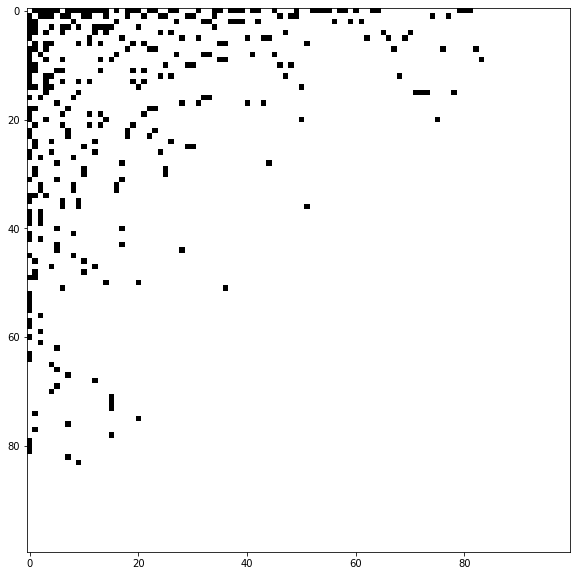

In [37]:
G=nx.from_numpy_array(np.array(simutable[7][46][14]))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

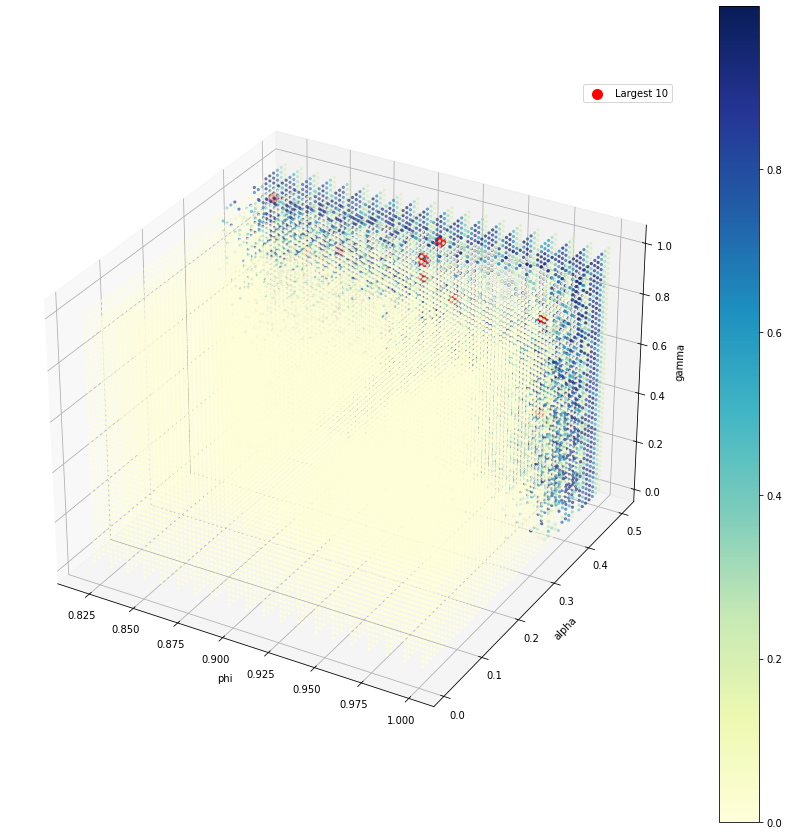

In [44]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = np.array(likelihoodlist).flatten()

# Scatter plot with colors from likelihoodlist
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.')

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -10)[-10:]

# Mark the largest points with red color
ax.scatter(x_flat[indices_largest], y_flat[indices_largest], z_flat[indices_largest],
           c='red', s=100, marker='o', label='Largest 10')

# Show the legend
ax.legend()

plt.show()

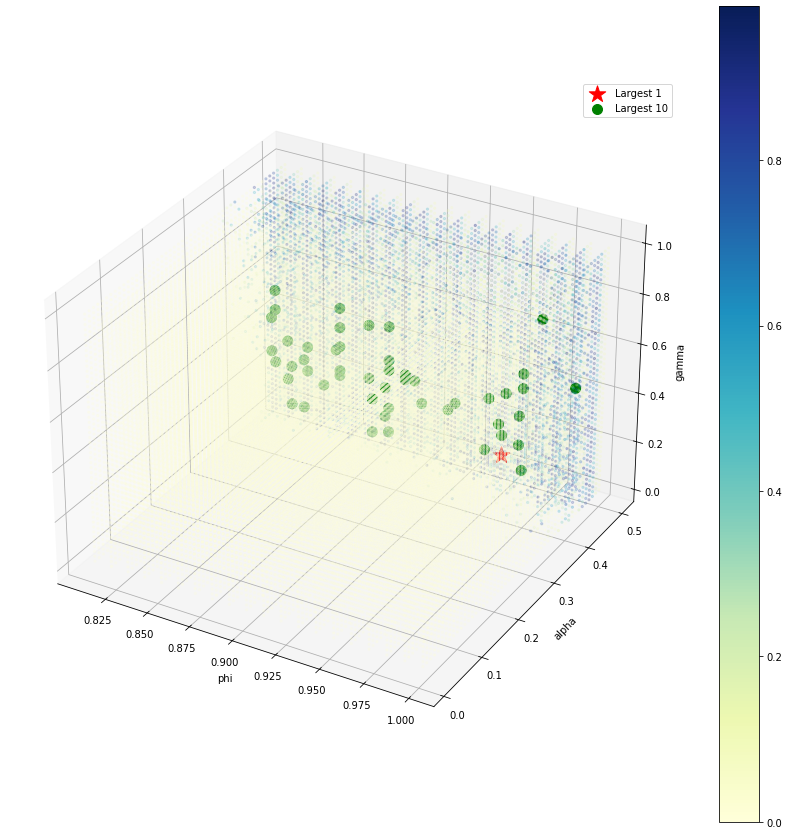

In [28]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.81, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.2 + 0.1 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 1 points
indices_largest_1 = np.argpartition(likelihood_flat, -1)[-1:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest_1], y_flat[indices_largest_1], z_flat[indices_largest_1],
           c='red', s=300, marker='*', label='Largest 1', alpha=1.0)

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -50)[-50:]

indices_low= np.setdiff1d(np.argpartition(likelihood_flat, -50)[-50:],indices_largest_1)

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_low], y_flat[indices_low], z_flat[indices_low],
           c='green', s=100, marker='o', label='Largest 10', alpha=1.0)


# Show the legend
ax.legend()

plt.show()

In [29]:
np.mean(x_flat[indices_largest])

0.8818

In [30]:
np.mean(y_flat[indices_largest])

0.4656

In [31]:
np.mean(z_flat[indices_largest])

0.2876

In [32]:
np.std(x_flat[indices_largest])

0.05278977173657787

In [33]:
np.std(y_flat[indices_largest])

0.006053098380168627

In [34]:
np.std(z_flat[indices_largest])

0.13913389234834195

In [ ]:
# statistical plotting

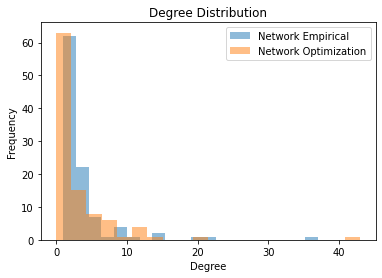

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = [degree for node, degree in G1.degree()]
degree_dist_G2 = [degree for node, degree in G2.degree()]

# Plot degree distributions
plt.hist(degree_dist_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(degree_dist_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

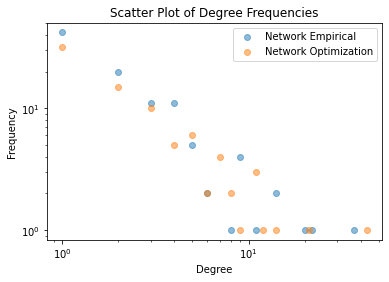

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 =  G_empirical  # Replace this with your actual data for the first network
G2 = G   # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = dict(Counter(dict(G1.degree()).values()))
degree_dist_G2 = dict(Counter(dict(G2.degree()).values()))

# Create scatter plot
plt.scatter(degree_dist_G1.keys(), degree_dist_G1.values(), alpha=0.5, label='Network Empirical')
plt.scatter(degree_dist_G2.keys(), degree_dist_G2.values(), alpha=0.5, label='Network Optimization')


plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree Frequencies')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

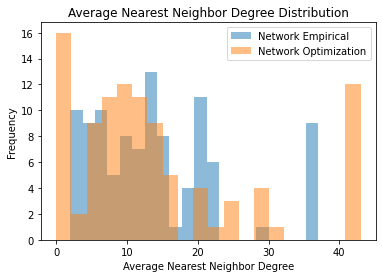

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate average nearest neighbor degrees
avg_nn_degree_G1 = list(nx.average_neighbor_degree(G1).values())
avg_nn_degree_G2 = list(nx.average_neighbor_degree(G2).values())

# Plot histograms
plt.hist(avg_nn_degree_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(avg_nn_degree_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Average Nearest Neighbor Degree Distribution')
plt.xlabel('Average Nearest Neighbor Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

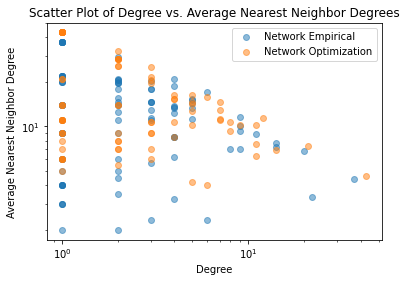

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate degrees and average nearest neighbor degrees
degrees_G1 = dict(G1.degree())
avg_nn_degree_G1 = nx.average_neighbor_degree(G1)

degrees_G2 = dict(G2.degree())
avg_nn_degree_G2 = nx.average_neighbor_degree(G2)

# Extract values for scatter plot
x_values_G1 = list(degrees_G1.values())
y_values_G1 = list(avg_nn_degree_G1.values())

x_values_G2 = list(degrees_G2.values())
y_values_G2 = list(avg_nn_degree_G2.values())

# Create scatter plot
plt.scatter(x_values_G1, y_values_G1, alpha=0.5, label='Network Empirical')
plt.scatter(x_values_G2, y_values_G2, alpha=0.5, label='Network Optimization')

plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree vs. Average Nearest Neighbor Degrees')
plt.xlabel('Degree')
plt.ylabel('Average Nearest Neighbor Degree')
plt.legend()
plt.show()



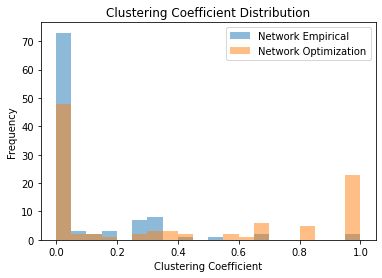

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Plot histograms
plt.hist(clustering_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(clustering_G2, bins=20, alpha=0.5, label='Network Optimization')

plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()


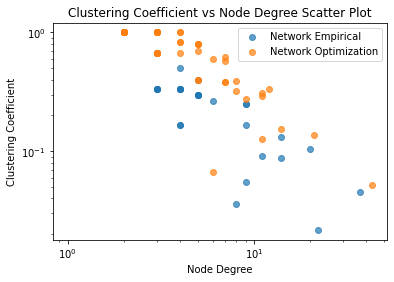

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate clustering coefficients and node degrees
clustering_G1 = nx.clustering(G1)
clustering_G2 = nx.clustering(G2)

degrees_G1 = dict(G1.degree())
degrees_G2 = dict(G2.degree())

# Extract values for plotting
nodes_G1, coefficients_G1 = zip(*clustering_G1.items())
nodes_G2, coefficients_G2 = zip(*clustering_G2.items())

degrees_values_G1 = [degrees_G1[node] for node in nodes_G1]
degrees_values_G2 = [degrees_G2[node] for node in nodes_G2]

# Plot scatter plot with x-axis as node degree
plt.scatter(degrees_values_G1, coefficients_G1, label='Network Empirical', alpha=0.7)
plt.scatter(degrees_values_G2, coefficients_G2, label='Network Optimization', alpha=0.7)

plt.xscale('log')
plt.yscale('log')


plt.title('Clustering Coefficient vs Node Degree Scatter Plot')
plt.xlabel('Node Degree')
plt.ylabel('Clustering Coefficient')
plt.legend()
plt.show()

